In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [4]:
sns.set_style('whitegrid')

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

In [8]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
df_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [11]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df_feat.shape

(569, 30)

In [14]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [15]:
df_target = pd.DataFrame(cancer['target'], columns=['cancer'])

In [16]:
df_target.head()

,cancer
0,0
1,0
2,0
3,0
4,0


In [17]:
df_target.shape

(569, 1)

In [18]:
df = pd.concat([df_feat, df_target], axis=1)

In [19]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
df.shape

(569, 31)

In [22]:
df.isnull().sum().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [25]:
df.cancer.value_counts()

1    357
0    212
Name: cancer, dtype: int64

<AxesSubplot:xlabel='cancer', ylabel='count'>

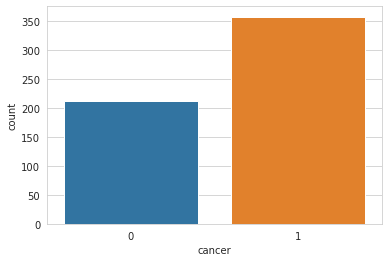

In [27]:
sns.countplot(x=df.cancer)

<AxesSubplot:>

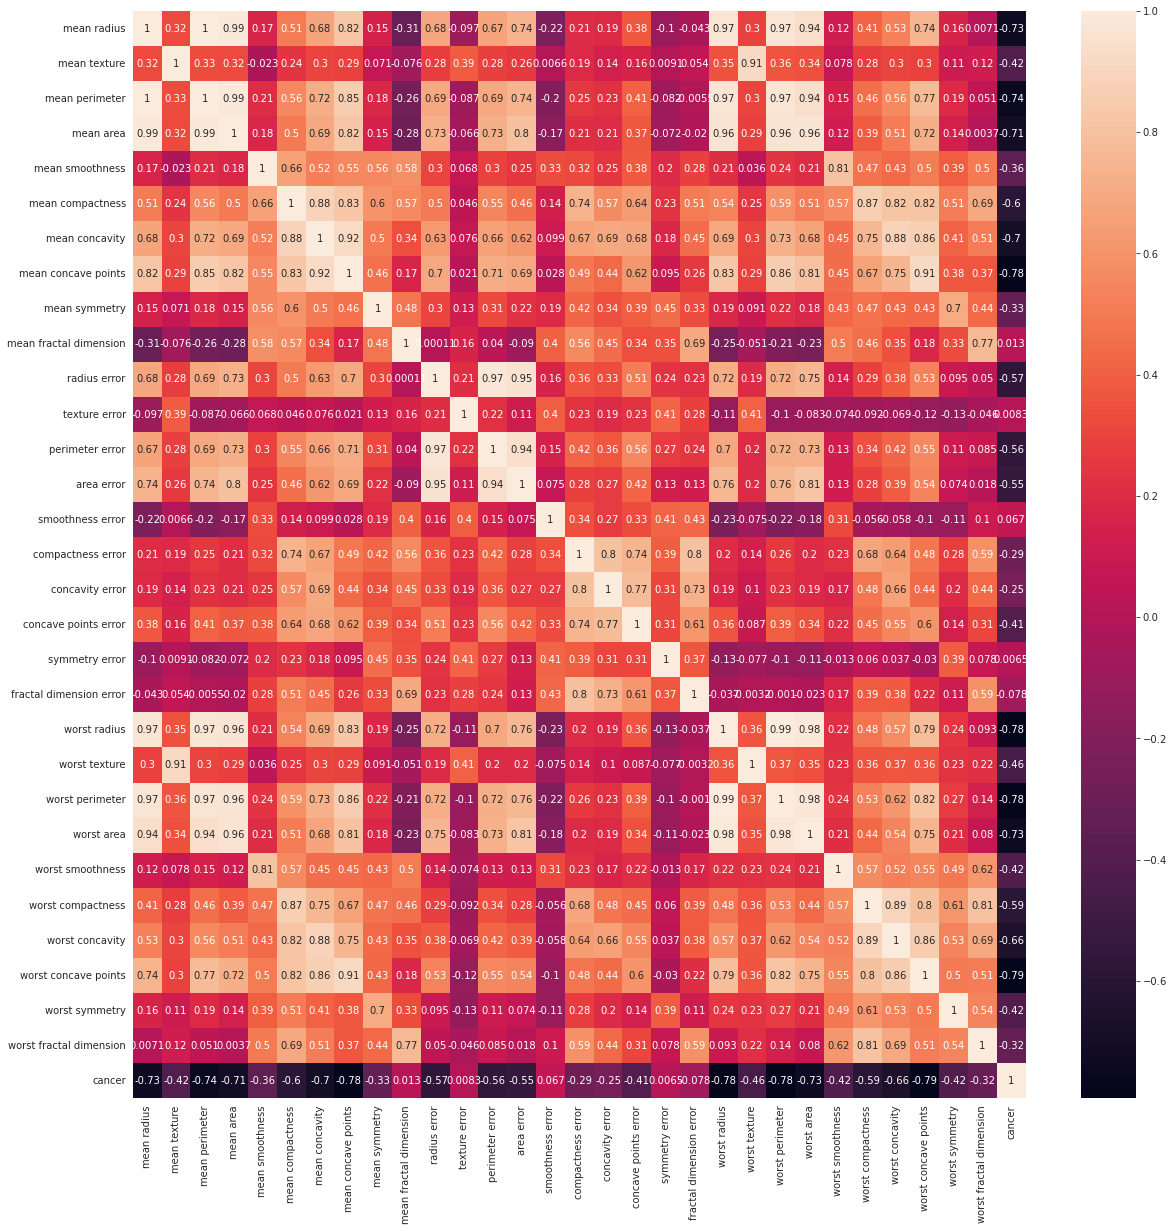

In [31]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

In [32]:
drop_list = ['worst perimeter', 'worst area', 'perimeter error', 'area error', 'mean perimeter', 'mean area']

In [33]:
df.drop(drop_list, axis=1, inplace=True)

In [34]:
df.shape

(569, 25)

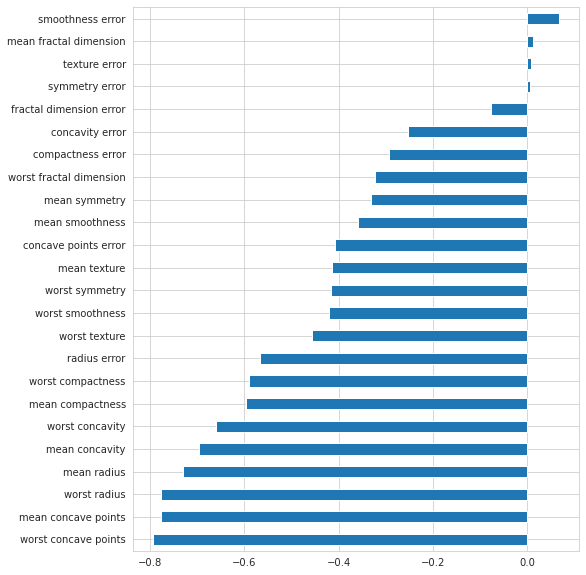

In [37]:
plt.figure(figsize=(8, 10))

df.corr()['cancer'].sort_values().drop('cancer').plot(kind='barh') ;

# Pre-processing

In [38]:
X = df.drop('cancer', axis=1)
y = df['cancer']

In [39]:
X.shape

(569, 24)

In [40]:
y.shape

(569,)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.transform(X_test)

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Activation

from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

In [50]:
model = Sequential()

model.add(Dense(30, activation='relu', input_dim=24))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                750       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1)

Epoch 1/1000
15/15 [==============================] - 1s 11ms/step - loss: 0.6817 - accuracy: 0.5717 - val_loss: 0.6551 - val_accuracy: 0.7885
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.8565 - val_loss: 0.6141 - val_accuracy: 0.9423
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.8870 - val_loss: 0.5648 - val_accuracy: 0.9615
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.8978 - val_loss: 0.5212 - val_accuracy: 0.9615
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.9109 - val_loss: 0.4756 - val_accuracy: 0.9615
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4707 - accuracy: 0.9152 - val_loss: 0.4247 - val_accuracy: 0.9615
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.9196 - val_loss: 0.3756 - val_accuracy: 0.9423
Epoch

In [56]:
loss_df = pd.DataFrame(model.history.history)

In [57]:
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.681650,0.571739,0.655133,0.788462
1,0.644191,0.856522,0.614088,0.942308
2,0.602898,0.886957,0.564785,0.961538
3,0.562541,0.897826,0.521178,0.961538
4,0.516827,0.910870,0.475560,0.961538
...,...,...,...,...
995,0.000654,1.000000,0.016779,1.000000
996,0.000647,1.000000,0.016602,1.000000
997,0.000695,1.000000,0.016729,1.000000
998,0.000659,1.000000,0.016764,1.000000


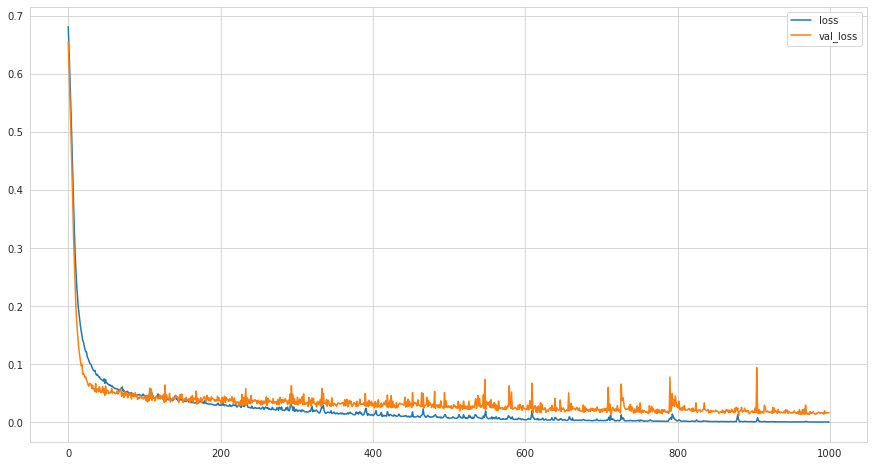

In [60]:
loss_df[['loss', 'val_loss']].plot(figsize=(15, 8));

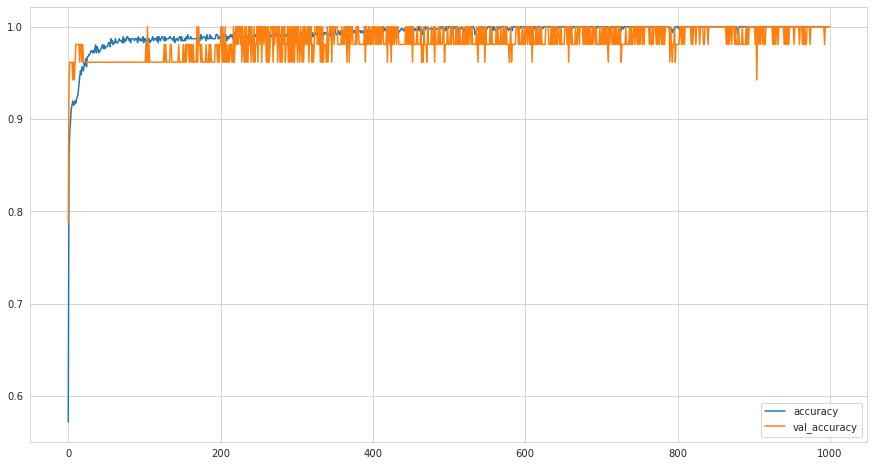

In [61]:
loss_df[['accuracy', 'val_accuracy']].plot(figsize=(15, 8));

In [62]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.9123


[0.5442604422569275, 0.9122806787490845]

In [63]:
y_pred = (model.predict(X_test) > 0.5).astype('int32')

In [64]:
y_pred

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.94      0.92      0.93        36

    accuracy                           0.91        57
   macro avg       0.90      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57



# Prevent overfitting

In [68]:
from keras.callbacks import EarlyStopping

In [69]:
model = Sequential()

model.add(Dense(30, activation='relu', input_dim=24))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [70]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=15)

In [73]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1, callbacks=[early_stop])

Epoch 1/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6556 - accuracy: 0.8043 - val_loss: 0.6417 - val_accuracy: 0.6923
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.8065 - val_loss: 0.6159 - val_accuracy: 0.6731
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5723 - accuracy: 0.8348 - val_loss: 0.5663 - val_accuracy: 0.7885
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.8804 - val_loss: 0.5256 - val_accuracy: 0.8846
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.8848 - val_loss: 0.4782 - val_accuracy: 0.8846
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4501 - accuracy: 0.8826 - val_loss: 0.4247 - val_accuracy: 0.8846
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4008 - accuracy: 0.9087 - val_loss: 0.3679 - val_accuracy: 0.9231
Epoch

In [74]:
loss_df = pd.DataFrame(model.history.history)

In [75]:
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.655624,0.804348,0.641665,0.692308
1,0.609268,0.806522,0.615922,0.673077
2,0.572251,0.834783,0.566295,0.788462
3,0.532852,0.880435,0.525557,0.884615
4,0.492502,0.884783,0.478231,0.884615


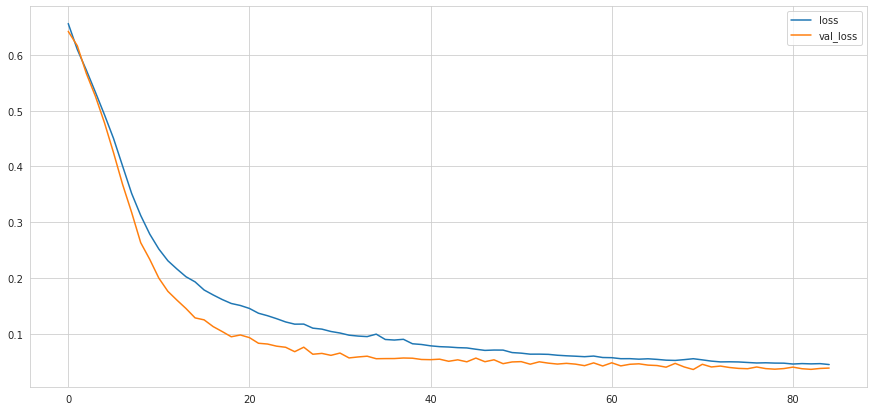

In [76]:
loss_df[['loss', 'val_loss']].plot(figsize=(15, 7));

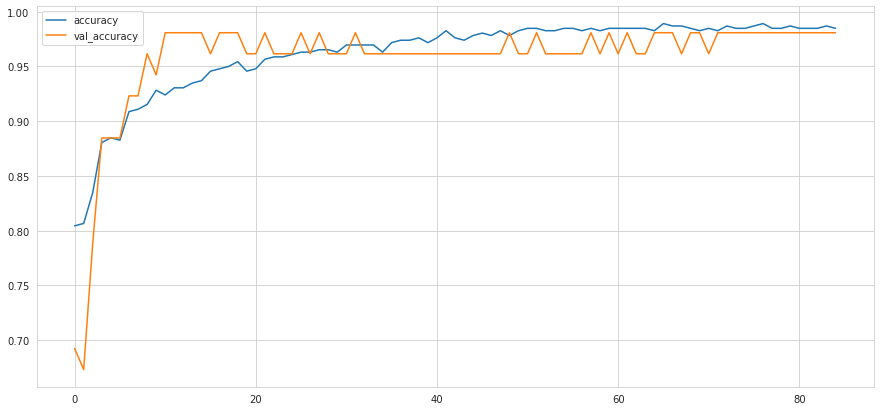

In [77]:
loss_df[['accuracy', 'val_accuracy']].plot(figsize=(15, 7));

In [78]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



# learning_rate

In [80]:
tf.__version__

'2.6.0'

In [81]:
from tensorflow.keras.optimizers import Adam

In [82]:
model = Sequential()

model.add(Dense(30, activation='relu', input_dim=24))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [83]:
model.compile(optimizer=Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [85]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.6326 - accuracy: 0.6652 - val_loss: 0.5515 - val_accuracy: 0.8462
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.8783 - val_loss: 0.3739 - val_accuracy: 0.8462
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.9000 - val_loss: 0.1851 - val_accuracy: 0.9423
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2109 - accuracy: 0.9152 - val_loss: 0.1115 - val_accuracy: 0.9615
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1667 - accuracy: 0.9391 - val_loss: 0.0803 - val_accuracy: 0.9808
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1459 - accuracy: 0.9435 - val_loss: 0.0762 - val_accuracy: 0.9615
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1410 - accuracy: 0.9500 - val_loss: 0.0691 - val_accuracy: 0.9615
Epoch 

In [86]:
loss_df = pd.DataFrame(model.history.history)

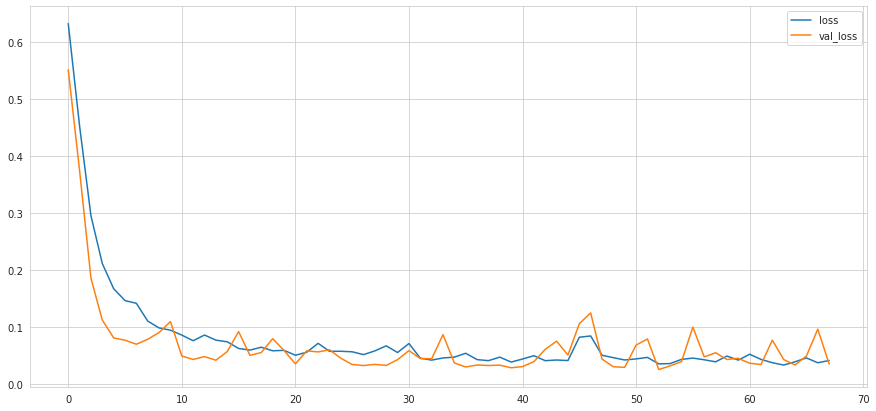

In [87]:
loss_df[['loss', 'val_loss']].plot(figsize=(15, 7));

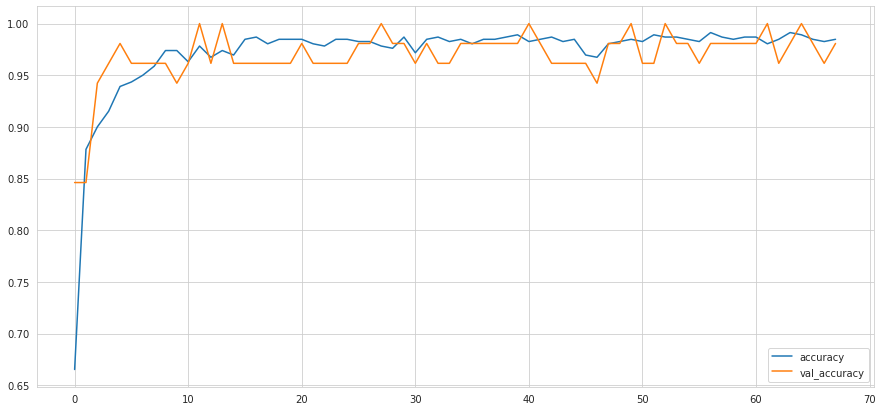

In [88]:
loss_df[['accuracy', 'val_accuracy']].plot(figsize=(15, 7));

In [89]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.97      0.92      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



In [90]:
from tensorflow.keras.layers import Dropout

In [102]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [103]:
model.fit(x = X_train, y = y_train, validation_split = 0.25, batch_size = 32, epochs = 150, verbose = 1)

Epoch 1/150
12/12 [==============================] - 0s 12ms/step - loss: 0.7436 - accuracy: 0.4089 - val_loss: 0.6785 - val_accuracy: 0.4219
Epoch 2/150
12/12 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5078 - val_loss: 0.6718 - val_accuracy: 0.6172
Epoch 3/150
12/12 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5339 - val_loss: 0.6679 - val_accuracy: 0.8750
Epoch 4/150
12/12 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6120 - val_loss: 0.6576 - val_accuracy: 0.8750
Epoch 5/150
12/12 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.6484 - val_loss: 0.6398 - val_accuracy: 0.8750
Epoch 6/150
12/12 [==============================] - 0s 4ms/step - loss: 0.6356 - accuracy: 0.7005 - val_loss: 0.6105 - val_accuracy: 0.9062
Epoch 7/150
12/12 [==============================] - 0s 3ms/step - loss: 0.6003 - accuracy: 0.7708 - val_loss: 0.5702 - val_accuracy: 0.9297
Epoch 8/150


In [104]:
loss_df = pd.DataFrame(model.history.history)

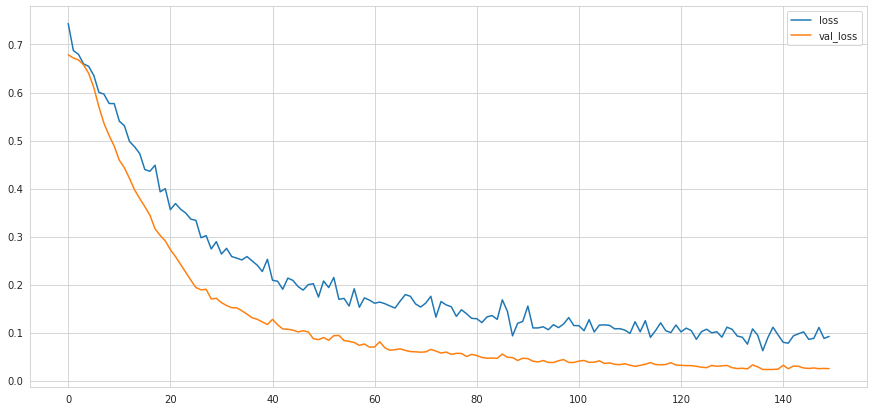

In [105]:
loss_df[['loss', 'val_loss']].plot(figsize=(15, 7));

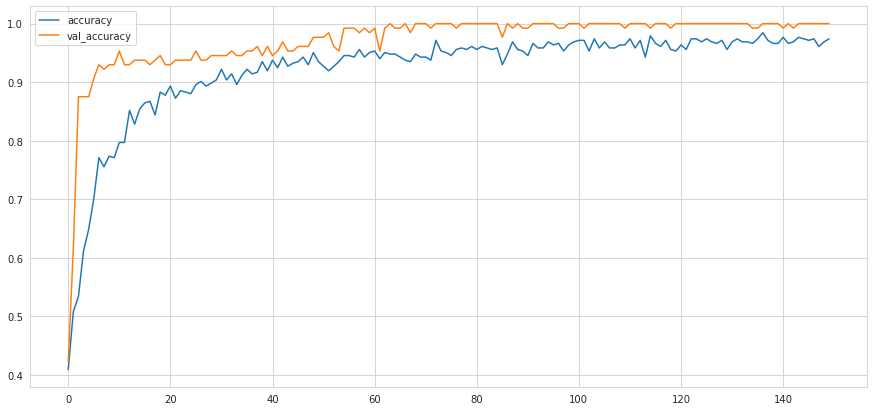

In [106]:
loss_df[['accuracy', 'val_accuracy']].plot(figsize=(15, 7));

In [107]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



In [108]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [109]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [114]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

In [115]:
scores = cross_validate(classifier, X_train, y_train, scoring=['accuracy', 'precision', 'f1', 'recall'], cv=10)

In [116]:
scores

{'fit_time': array([2.91630626, 2.92597485, 2.98057127, 2.91833639, 2.95990205,
        2.97294331, 3.06524944, 3.08548951, 3.02809072, 3.01857805]),
 'score_time': array([0.06333303, 0.06669426, 0.05882215, 0.05948043, 0.05785131,
        0.06186843, 0.06472754, 0.06405854, 0.05942249, 0.06181073]),
 'test_accuracy': array([0.96153846, 1.        , 0.96078431, 1.        , 0.90196078,
        0.96078431, 0.98039216, 1.        , 1.        , 0.98039216]),
 'test_precision': array([0.96774194, 1.        , 0.97142857, 1.        , 0.89189189,
        0.97058824, 0.97058824, 1.        , 1.        , 0.96153846]),
 'test_f1': array([0.96774194, 1.        , 0.97142857, 1.        , 0.92957746,
        0.97058824, 0.98507463, 1.        , 1.        , 0.98039216]),
 'test_recall': array([0.96774194, 1.        , 0.97142857, 1.        , 0.97058824,
        0.97058824, 1.        , 1.        , 1.        , 1.        ])}

In [117]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,test_precision,test_f1,test_recall
0,2.916306,0.063333,0.961538,0.967742,0.967742,0.967742
1,2.925975,0.066694,1.000000,1.000000,1.000000,1.000000
2,2.980571,0.058822,0.960784,0.971429,0.971429,0.971429
3,2.918336,0.059480,1.000000,1.000000,1.000000,1.000000
4,2.959902,0.057851,0.901961,0.891892,0.929577,0.970588
5,2.972943,0.061868,0.960784,0.970588,0.970588,0.970588
6,3.065249,0.064728,0.980392,0.970588,0.985075,1.000000
7,3.085490,0.064059,1.000000,1.000000,1.000000,1.000000
8,3.028091,0.059422,1.000000,1.000000,1.000000,1.000000
9,3.018578,0.061811,0.980392,0.961538,0.980392,1.000000


In [118]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [119]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 15)

In [120]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)

In [121]:
parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}

In [122]:
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          verbose = 1)

In [123]:
grid_model.fit(X_train, y_train, callbacks=[early_stop])

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Epoch 1/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5087
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.7978
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.8478
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.8739
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.8870
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.9043
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.9065
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.9065
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.9109
Epoch 10/200
15/15 [==========================

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc38c4823d0>,
             param_grid={'batch_size': [32, 64],
                         'optimizer': ['adam', 'rmsprop', 'SGD', 'adagrad',
                                       'adadelta']},
             scoring='accuracy', verbose=1)

In [125]:
grid_model.best_params_

{'batch_size': 32, 'optimizer': 'rmsprop'}

In [126]:
grid_model.best_score_

0.9746229260935143